# HEAVY TRAFFIC INDICATORS ON I-94

 In this project we will be analyzing the [Metro_Interstate_Traffic_Volume.csv](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) and are going to try and answer some questions like what are some major indicators for the heavy traffic on I-94 which is east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

In [1]:
# Importing some useful libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading in the csv
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
# Getting info about the dataset
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB



It seems that all the values in the dataframe are non-null. There are a total of 8 columns.
The official documentation also say that the data was station that is located midway between Minneapolis and Saint Paul.
It is also important to note that the data recorded is only for westbound traffic and should not be generalized for the whole I-94 highway. You can read the official documentation [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

### We are now going to start with visual analysis

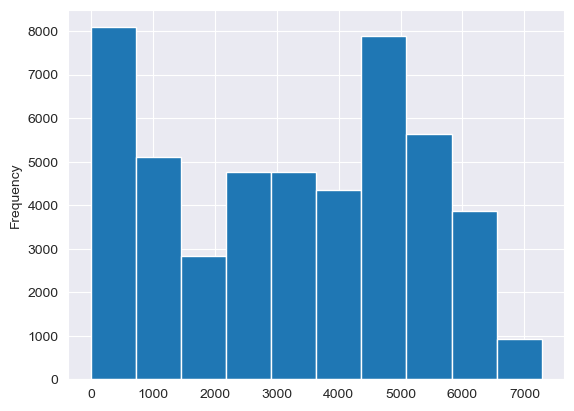

In [6]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 there traffic ranged between (0, 7280). At least one day when the traffic recorded was 0 which might suggest the I-94 might be under construction and hence no traffic recorded, or it could mean that the traffic was diverted just before crossing the recording station. The above values suggest that 25% of the time there was only 1193 traffic and another 25% of the time had a volume of 4933 which is more than 4 times the earlier one. This difference could be because of nighttime and daytime traffic.

## DAYTIME VS NIGHTTIME

We have to first divide out dataset into sets now one that contains info about the daytime and other about the nighttime.
We will take 7:00 A.M. to 7:00 P.M. as daytime and 7:00 P.M. to 7:00 A.M. as nighttime.


In [8]:
traffic['date_time']= pd.to_datetime(traffic['date_time'])
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [9]:
nighttime = traffic[(traffic['date_time'].dt.hour >= 19)  | (traffic['date_time'].dt.hour < 7)]
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


This project is on hold and is waiting for an answer on stackoverflow
The question has been answered and above we are using bitwise or and not logical or because we are comparing two boolean lists and not one variable hence we need to use bitwise to compare each element in the list.
The question is [here](https://stackoverflow.com/questions/74783261/condition-for-determining-day-or-night-when-using-datetime-module-in-python)

In [10]:
daytime = traffic[(traffic['date_time'].dt.hour < 19)  & (traffic['date_time'].dt.hour >= 7)]
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


### Now we are going to plot the traffic volume side by side on a histogram

Text(0.5, 0, 'Traffic Volume')

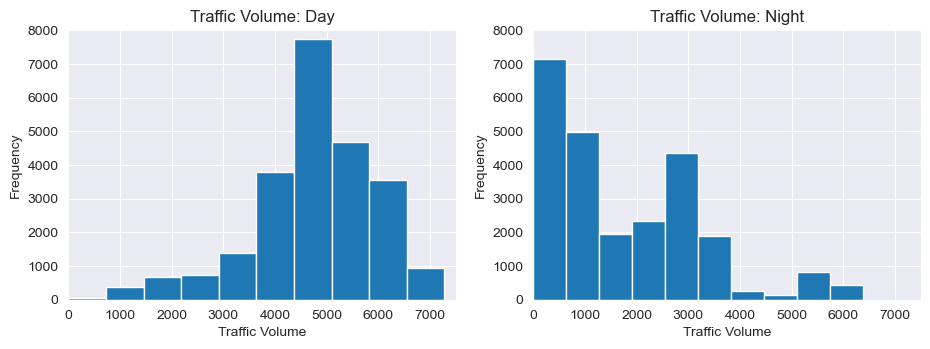

In [11]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')


Looking at the resulting graphs we can deduce that most of the days the traffic during daytime is 4000 to 6000 and during nighttime it's mostly below 3000.

In [12]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Also, the first graph looks left skewed and the second graph looks right skewed. The skewness describes that there is rarely traffic less than 4252(because the 25% value is 4252 meaning 75% of the values are more than that) during daytime and there is hardly traffic more than 2819(because the 75% value is 2819 meaning that only 25 % of values are more than it in the whole dataset) during nighttime.

Since, the traffic at nighttime is generally low by its nature we can go ahead and resume our journey to find the heavy traffic indicators using the daytime dataframe we have built

### We are now going to group the values of daytime by day of week, month, year.


# TIME INDICATOR I (DAY OF THE WEEK)

In [14]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
daytime['dayofweek'].head()

0    1
1    1
2    1
3    1
4    1
Name: dayofweek, dtype: int64

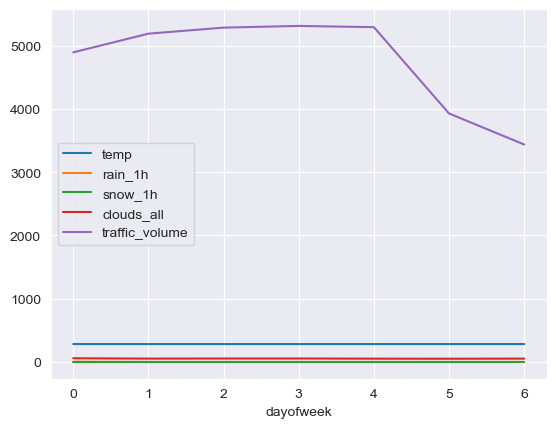

In [15]:
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek.plot()
plt.show()

On the above plot 0 means Monday and  6 means Sunday. As we can see that the traffic is usually higher on the workdays and lighter on the weekends

# TIME INDICATOR II (MONTH OF THE YEAR)

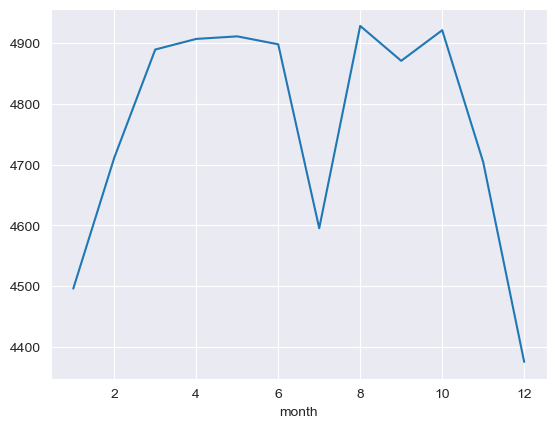

In [16]:
daytime['month'] = daytime['date_time'].dt.month
by_month =  daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We can see that the traffic is usually less during the winter time that is October to March. Another interesting discovery is the dip in traffic volume during the month July.

To check what so special about July we are going to plot the yearly graph in July specifically.


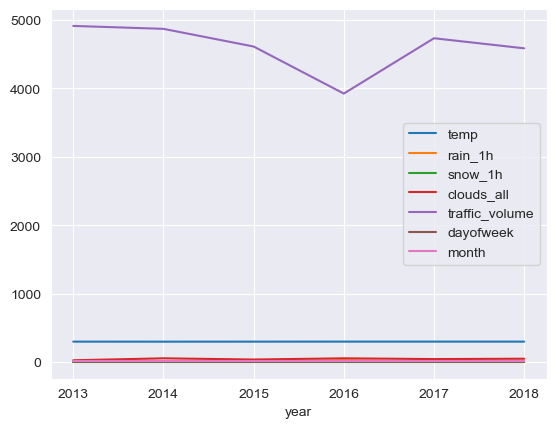

In [17]:
daytime['year'] = daytime['date_time'].dt.year
traffic_by_July = daytime[daytime['month'] == 7]
traffic_by_July.groupby('year').mean().plot.line()
plt.show()

It seems like only in 2016 the drop in the month of July was there. So, we can now confirm it was an exception, and it might be due to some work on the highway in progress.

# TIME INDICATOR III (HOUR OF THE DAY)

We will make a graph for the whole week for a reference point first to showcase the difference in taking the week as a whole and taking it in workdays and weekends.

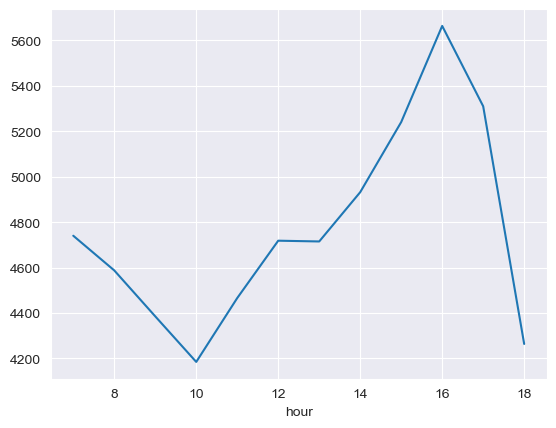

In [18]:
daytime['hour'] = daytime['date_time'].dt.hour
by_hour = daytime.groupby('hour').mean()
by_hour['traffic_volume'].plot.line()
plt.show()

Let's start with dividing the date on workday and weekend

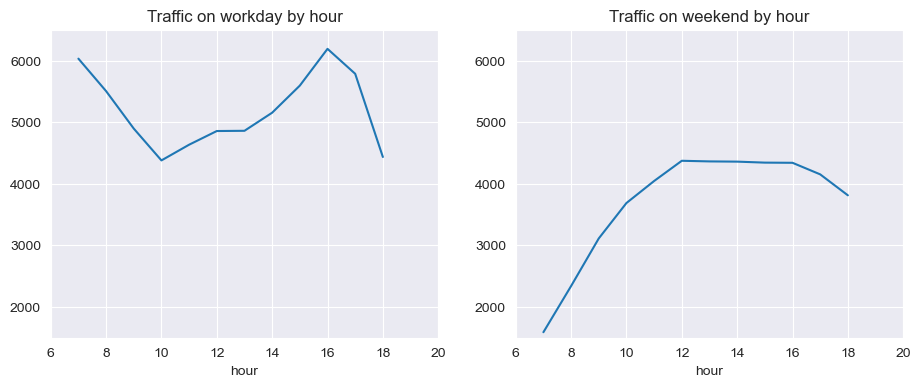

In [19]:
# Workday calculation
workday = daytime[daytime['dayofweek'] < 5]  # Monday to Friday
by_hour_workday = workday.groupby('hour').mean()

# Weekend calculation
weekend = daytime[daytime['dayofweek'] >= 5]  # Saturday and Sunday
by_hour_weekend = weekend.groupby('hour').mean()

# plotting

plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
by_hour_workday['traffic_volume'].plot.line()
plt.title('Traffic on workday by hour')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic on weekend by hour')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()


We can clearly see that the in the hourly distribution throughout the week the average was being pulled down weekends and without them the workdays have generally more traffic on an average.

On workdays, we can see that the traffic peaks at 7:00 A.M. and 4:00 P.M. These are the times when people leave for work and are returning from work respectively.
On weekends the traffic peaks around 12:00 P.M. till 4:00 P.M.

From our analysis we have now found these indicators of heavy traffic:
* The traffic is heavier on the workdays.
* The traffic is heavier in warm seasons.
* The traffic is heavier during the workhours on workdays and on weekends its heavier during the noon.

# WEATHER INDICATORS

In [20]:
daytime.corr()[['temp', 'rain_1h', 'snow_1h', 'clouds_all']].loc['traffic_volume']

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

Only temp seems to have somewhat of a correlation with traffic. We also saw this in the time indicator where the traffic was more iin warm seasons.

Let's draw a scatter plot for this relation

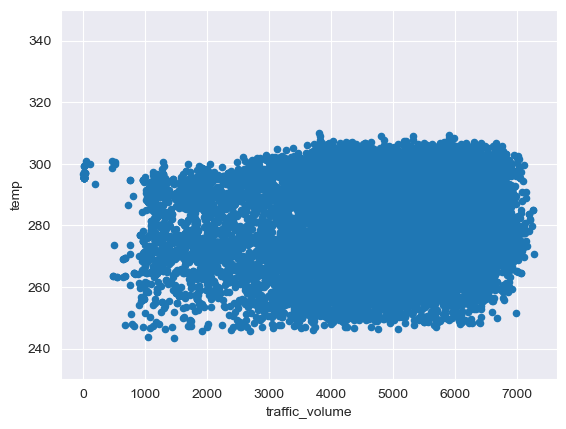

In [21]:
daytime.plot.scatter(y = 'temp', x = 'traffic_volume')
plt.ylim(230,350)  # two 0K entries were distorting the scatter plot
plt.show()

The above scatter plot doesn't show any clear relation.
Let's move on to the other ``` weather_main ``` and ``` weather_description ```

<AxesSubplot:ylabel='weather_main'>

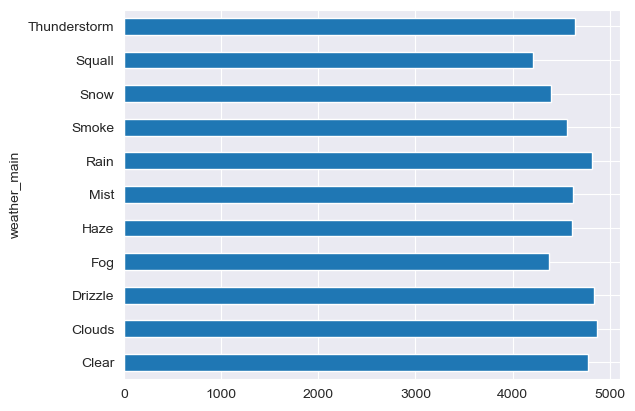

In [22]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

it seems like there is no weather where the traffic exceeded 5000, this makes the analysis harder as they are all pretty close. Let's call onto weather_description for more thorough analysis

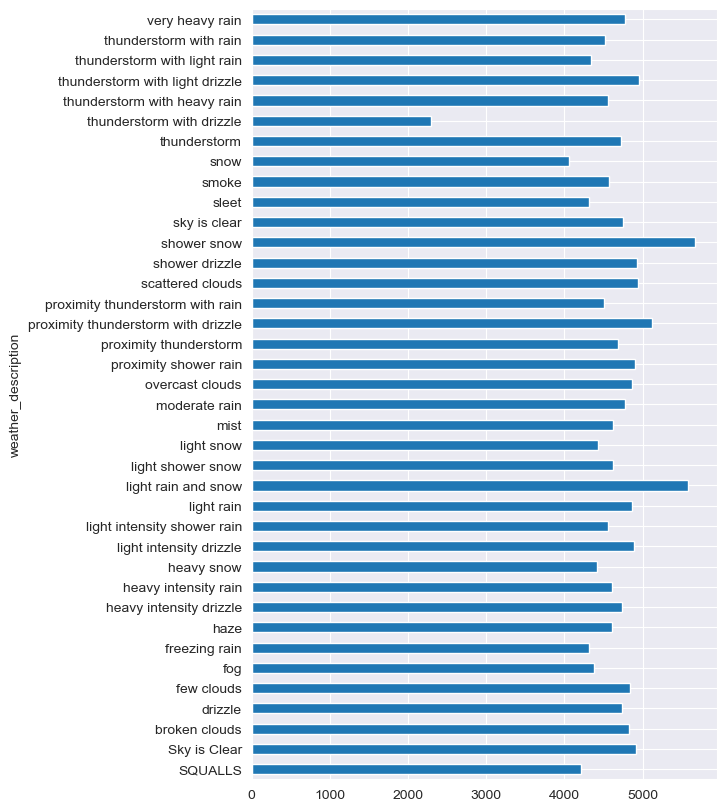

In [23]:
by_weather_desc = daytime.groupby('weather_description').mean()
by_weather_desc['traffic_volume'].plot.barh(figsize=(6,10))
plt.show()

In the above plot we can see that the traffic spikes when the weather description is as follows:
* light rain and snow
* shower snow
The weather is bad, but it isn't that bad. So, the reason of spike is hard to pinpoint.
It might be because people might take their cars to travel during this kind of weather rather than using a bicycle or riding a bike.

# CONCLUSION

We ended with the following indicators of heavy traffic on I-94:
1. TIME INDICATORS:
* The traffic is usually heavier in warm months and lighter in cold months.
* The traffic is usually heavier on workdays as compared to weekends.
* The traffic is usually heavier on the times of the day when people leave for work or are returning from work. On weekends, it is noon that has heavy traffic.

2. WEATHER INDICATORS:
* Light rain and snow
* Shower snow